# Lets now pick one good model type and build a set of model across all the data using 5 fold cross validation and obtain ROC curves etc.

In [8]:
# Read the data
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df = pd.read_csv('segments_fs_width_50pct_overlap_DTAB_GT.csv')

# convert seizure type to categorical
df['seizure'] = df['seizure'].astype('category')

X = df.drop('seizure', axis=1)
y = df['seizure']

# Assuming you have your data in X (features) and y (target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

df.head()

,delta,theta,alpha,beta,seizure
0,0.995975,0.075758,0.043777,0.019427,0
1,0.992658,0.111096,0.044879,0.016525,0
2,0.993037,0.108308,0.040143,0.023155,0
3,0.763365,0.570391,0.243744,0.180323,0
4,0.864663,0.453227,0.206527,0.065492,0


Cross-validation results:
   Sensitivity  Specificity  Precision       AUC
0     0.900000     0.600000   0.600000  0.790000
1     0.615385     0.583333   0.615385  0.634615
2     0.750000     0.692308   0.692308  0.794872
3     0.642857     0.636364   0.692308  0.636364
4     0.714286     0.272727   0.555556  0.483766
Mean Sensitivity: 0.7245054945054945
Mean Specificity: 0.5569463869463869
Mean Precision: 0.6311111111111112
Mean AUC: 0.6679234099234098


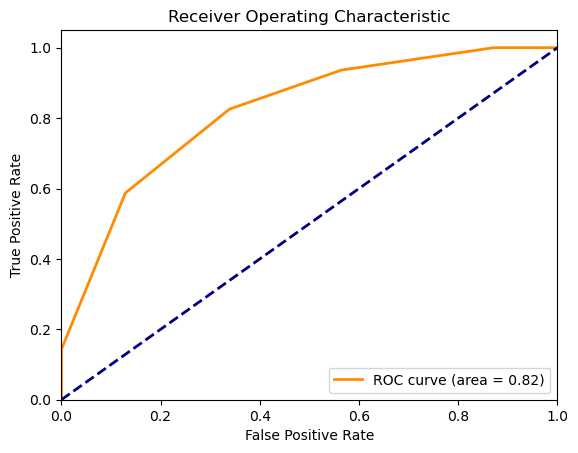

,TPR,FPR,Threshold
0,0.000000,0.000000,inf
1,0.142857,0.000000,1.0
2,0.587302,0.129032,0.8
3,0.825397,0.338710,0.6
4,0.936508,0.564516,0.4
5,1.000000,0.870968,0.2
6,1.000000,1.000000,0.0


In [9]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42) #setting random state for reproducibility

# Cross-validation predictions
y_pred = cross_val_predict(knn, X, y, cv=kfold, method='predict_proba')[:, 1]

# Initialize lists to store metrics for each fold
sensitivity_list = []
specificity_list = []
precision_list = []
auc_list = []

# Compute metrics for each fold
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] # Use iloc to select rows
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # Use iloc to select rows


    knn.fit(X_train, y_train)
    y_pred_fold = knn.predict(X_test)
    y_prob_fold = knn.predict_proba(X_test)[:, 1]

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_fold).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_test, y_pred_fold)
    fpr, tpr, _ = roc_curve(y_test, y_prob_fold)
    roc_auc = auc(fpr, tpr)

    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    precision_list.append(precision)
    auc_list.append(roc_auc)

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Sensitivity': sensitivity_list,
    'Specificity': specificity_list,
    'Precision': precision_list,
    'AUC': auc_list
})

print("Cross-validation results:")
print(results_df)
print("Mean Sensitivity:", results_df['Sensitivity'].mean())
print("Mean Specificity:", results_df['Specificity'].mean())
print("Mean Precision:", results_df['Precision'].mean())
print("Mean AUC:", results_df['AUC'].mean())

# Fit the model on the entire dataset
knn.fit(X, y)

# Predict probabilities for the positive class
y_prob = knn.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

# Create a DataFrame with TPR, FPR, and thresholds
roc_results_df = pd.DataFrame({'TPR': tpr, 'FPR': fpr, 'Threshold': thresholds})

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

roc_results_df

Cross-validation results:
   Sensitivity  Specificity  Precision       AUC
0     0.900000     0.600000   0.600000  0.790000
1     0.615385     0.583333   0.615385  0.634615
2     0.750000     0.692308   0.692308  0.794872
3     0.642857     0.636364   0.692308  0.636364
4     0.714286     0.272727   0.555556  0.483766
Mean Sensitivity: 0.7245054945054945
Mean Specificity: 0.5569463869463869
Mean Precision: 0.6311111111111112
Mean AUC: 0.6679234099234098


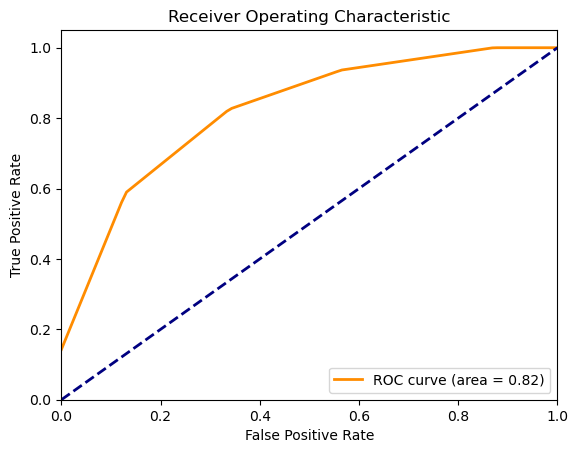

,TPR,FPR,Threshold,Specificity
0,0.142857,0.000000,1.000000,1.000000
1,0.177650,0.010101,0.984343,0.989899
2,0.212442,0.020202,0.968687,0.979798
3,0.247234,0.030303,0.953030,0.969697
4,0.282027,0.040404,0.937374,0.959596
5,0.316819,0.050505,0.921717,0.949495
6,0.351611,0.060606,0.906061,0.939394
7,0.386404,0.070707,0.890404,0.929293
8,0.421196,0.080808,0.874747,0.919192
9,0.455988,0.090909,0.859091,0.909091


In [10]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42) #setting random state for reproducibility

# Cross-validation predictions
y_pred = cross_val_predict(knn, X, y, cv=kfold, method='predict_proba')[:, 1]

# Initialize lists to store metrics for each fold
sensitivity_list = []
specificity_list = []
precision_list = []
auc_list = []

# Compute metrics for each fold
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] # Use iloc to select rows
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # Use iloc to select rows

    knn.fit(X_train, y_train)
    y_pred_fold = knn.predict(X_test)
    y_prob_fold = knn.predict_proba(X_test)[:, 1]

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_fold).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_test, y_pred_fold)
    fpr, tpr, _ = roc_curve(y_test, y_prob_fold)
    roc_auc = auc(fpr, tpr)

    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    precision_list.append(precision)
    auc_list.append(roc_auc)

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Sensitivity': sensitivity_list,
    'Specificity': specificity_list,
    'Precision': precision_list,
    'AUC': auc_list
})

print("Cross-validation results:")
print(results_df)
print("Mean Sensitivity:", results_df['Sensitivity'].mean())
print("Mean Specificity:", results_df['Specificity'].mean())
print("Mean Precision:", results_df['Precision'].mean())
print("Mean AUC:", results_df['AUC'].mean())

# Fit the model on the entire dataset
knn.fit(X, y)

# Predict probabilities for the positive class
y_prob = knn.predict_proba(X)[:, 1]

# Compute ROC curve and AUC with at least 100 points
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

# Interpolate to get at least 100 points
fpr_interp = np.linspace(0, 1, 100)
tpr_interp = np.interp(fpr_interp, fpr, tpr)
thresholds_interp = np.interp(fpr_interp, fpr, thresholds)

# Create a DataFrame with TPR, FPR, and thresholds
roc_results_df = pd.DataFrame({'TPR': tpr_interp, 'FPR': fpr_interp, 'Threshold': thresholds_interp})

roc_results_df['Specificity'] = 1 - roc_results_df['FPR']

# Plot the ROC curve
plt.figure()
plt.plot(fpr_interp, tpr_interp, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

pd.set_option('display.max_rows', None)

roc_results_df

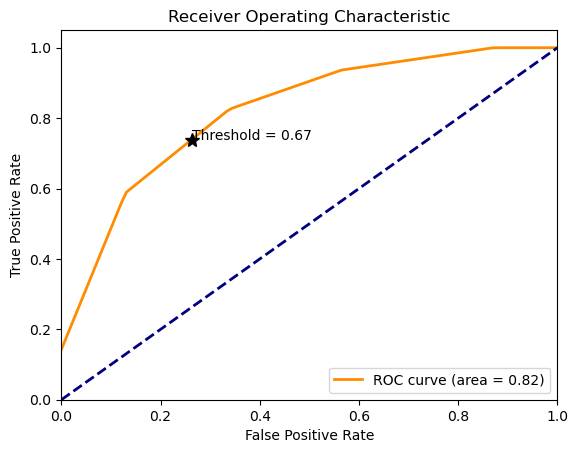

In [11]:
# prompt: update the roc curve to plot a star in black for the point where tpr is equal to specificity per roc_results_df

import matplotlib.pyplot as plt
# Find the point where TPR equals specificity
tpr_specificity_df = roc_results_df[round(roc_results_df['TPR'],2) == round(roc_results_df['Specificity'],2)]
# use the first row
tpr_specificity_df = tpr_specificity_df.head(1)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_interp, tpr_interp, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plot the star if a point exists where TPR equals specificity
if not tpr_specificity_df.empty:
    plt.plot(tpr_specificity_df['FPR'].iloc[0], tpr_specificity_df['TPR'].iloc[0], '*', color='black', markersize=10)
    # add a label for that point with the value of the threshold itself from roc_results_df
    plt.text(tpr_specificity_df['FPR'].iloc[0], tpr_specificity_df['TPR'].iloc[0], f"Threshold = {round(tpr_specificity_df['Threshold'].iloc[0],2)}", fontsize=10)

plt.show()


# Save the model to the disk

In [12]:
# save the model 
import joblib
joblib.dump(knn, 'knn_model.pkl')


['knn_model.pkl']

# Load the model back from disk

In [15]:
# Load model from pkl
import joblib
import pandas as pd
knn = joblib.load('knn_model.pkl')

df = pd.read_csv('segments_fs_width_50pct_overlap_DTAB_GT.csv')

# convert seizure type to categorical
df['seizure'] = df['seizure'].astype('category')

X = df.drop('seizure', axis=1)
y = df['seizure']

# Predict probabilities for the positive class
y_prob = knn.predict_proba(X)[:, 1]

# Compute ROC curve and AUC with at least 100 points
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc

0.8198924731182796

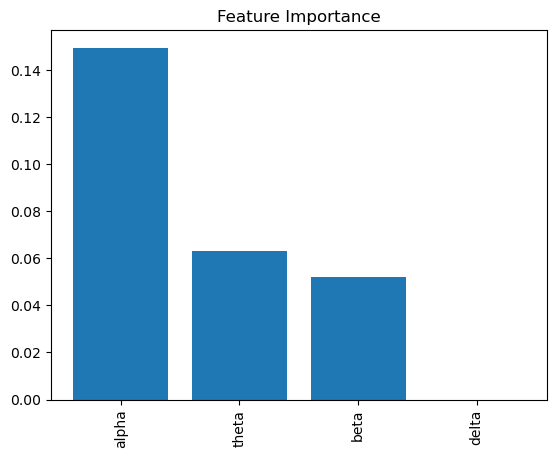

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# Assuming knn is your trained KNN model and X, y are your data and labels
result = permutation_importance(knn, X, y, n_repeats=10, random_state=42)

# Get feature importances from the permutation importance result
importances = result.importances_mean

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]

# Get the names of the features sorted by importance
names = [X.columns[i] for i in indices]

# Plot the feature importances
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

# FEATURE SELECTION: Rebuild the model using the top two features only


In [22]:
# Read the data
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df = pd.read_csv('segments_fs_width_50pct_overlap_DTAB_GT.csv')

# convert seizure type to categorical
df['seizure'] = df['seizure'].astype('category')

X = df.drop(['seizure','delta','beta'], axis=1)

y = df['seizure']

df.head()

,delta,theta,alpha,beta,seizure
0,0.995975,0.075758,0.043777,0.019427,0
1,0.992658,0.111096,0.044879,0.016525,0
2,0.993037,0.108308,0.040143,0.023155,0
3,0.763365,0.570391,0.243744,0.180323,0
4,0.864663,0.453227,0.206527,0.065492,0


In [24]:
X.head()

,theta,alpha
0,0.075758,0.043777
1,0.111096,0.044879
2,0.108308,0.040143
3,0.570391,0.243744
4,0.453227,0.206527


Cross-validation results:
   Sensitivity  Specificity  Precision       AUC
0     0.700000     0.533333   0.500000  0.666667
1     0.692308     0.583333   0.642857  0.669872
2     0.750000     0.846154   0.818182  0.766026
3     0.571429     0.727273   0.727273  0.626623
4     0.714286     0.363636   0.588235  0.522727
Mean Sensitivity: 0.6856043956043957
Mean Specificity: 0.6107459207459208
Mean Precision: 0.6553093964858671
Mean AUC: 0.6503829503829504


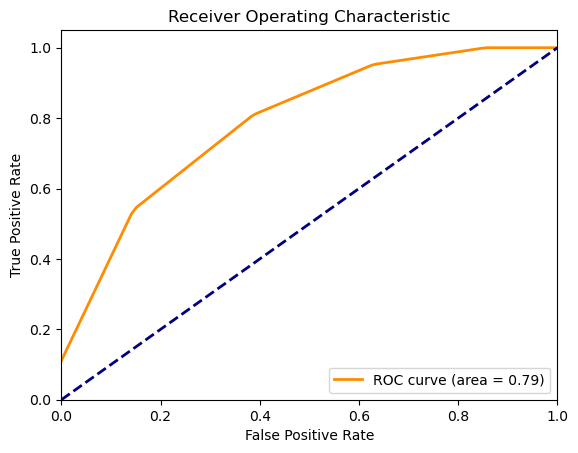

,TPR,FPR,Threshold,Specificity
0,0.111111,0.000000,1.000000,1.000000
1,0.140933,0.010101,0.986083,0.989899
2,0.170755,0.020202,0.972166,0.979798
3,0.200577,0.030303,0.958249,0.969697
4,0.230399,0.040404,0.944332,0.959596
5,0.260221,0.050505,0.930415,0.949495
6,0.290043,0.060606,0.916498,0.939394
7,0.319865,0.070707,0.902581,0.929293
8,0.349687,0.080808,0.888664,0.919192
9,0.379509,0.090909,0.874747,0.909091


In [26]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42) #setting random state for reproducibility

# Cross-validation predictions
y_pred = cross_val_predict(knn, X, y, cv=kfold, method='predict_proba')[:, 1]

# Initialize lists to store metrics for each fold
sensitivity_list = []
specificity_list = []
precision_list = []
auc_list = []

# Compute metrics for each fold
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] # Use iloc to select rows
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # Use iloc to select rows

    knn.fit(X_train, y_train)
    y_pred_fold = knn.predict(X_test)
    y_prob_fold = knn.predict_proba(X_test)[:, 1]

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_fold).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_test, y_pred_fold)
    fpr, tpr, _ = roc_curve(y_test, y_prob_fold)
    roc_auc = auc(fpr, tpr)

    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    precision_list.append(precision)
    auc_list.append(roc_auc)

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Sensitivity': sensitivity_list,
    'Specificity': specificity_list,
    'Precision': precision_list,
    'AUC': auc_list
})

print("Cross-validation results:")
print(results_df)
print("Mean Sensitivity:", results_df['Sensitivity'].mean())
print("Mean Specificity:", results_df['Specificity'].mean())
print("Mean Precision:", results_df['Precision'].mean())
print("Mean AUC:", results_df['AUC'].mean())

# Fit the model on the entire dataset
knn.fit(X, y)

# Predict probabilities for the positive class
y_prob = knn.predict_proba(X)[:, 1]

# Compute ROC curve and AUC with at least 100 points
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

# Interpolate to get at least 100 points
fpr_interp = np.linspace(0, 1, 100)
tpr_interp = np.interp(fpr_interp, fpr, tpr)
thresholds_interp = np.interp(fpr_interp, fpr, thresholds)

# Create a DataFrame with TPR, FPR, and thresholds
roc_results_df = pd.DataFrame({'TPR': tpr_interp, 'FPR': fpr_interp, 'Threshold': thresholds_interp})

roc_results_df['Specificity'] = 1 - roc_results_df['FPR']

# Plot the ROC curve
plt.figure()
plt.plot(fpr_interp, tpr_interp, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

pd.set_option('display.max_rows', None)

roc_results_df

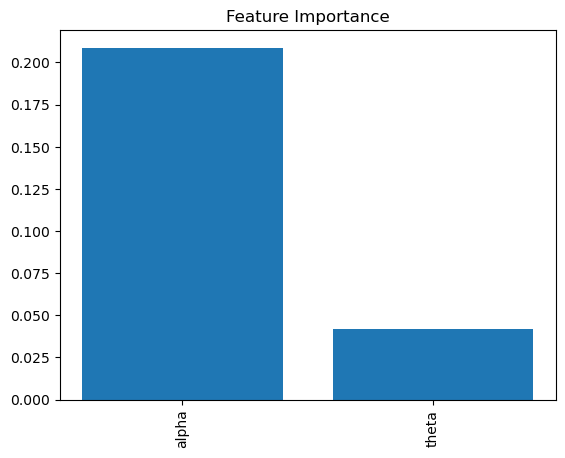

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# Assuming knn is your trained KNN model and X, y are your data and labels
result = permutation_importance(knn, X, y, n_repeats=10, random_state=42)

# Get feature importances from the permutation importance result
importances = result.importances_mean

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]

# Get the names of the features sorted by importance
names = [X.columns[i] for i in indices]

# Plot the feature importances
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()